In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("Titanic-Dataset.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
features = ["Pclass", "Sex","Fare","Embarked","Age"]
target = ["Survived"]

In [6]:
# Missing Data
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(strategy="median")
titanic[["Age"]] = imp_median.fit_transform(titanic[["Age"]])

imp_freq = SimpleImputer(strategy="most_frequent")
titanic[["Embarked"]] = imp_freq.fit_transform(titanic[["Embarked"]])

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
# Encoding

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

titanic["Sex"] = le.fit_transform(titanic["Sex"])
titanic["Embarked"] = le.fit_transform(titanic["Embarked"])

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [10]:
X = titanic[features]
y= titanic[target]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.head()

,Pclass,Sex,Fare,Embarked,Age
445,1,1,81.8583,2,4.0
650,3,1,7.8958,2,28.0
172,3,0,11.1333,2,1.0
450,2,1,27.7500,2,36.0
314,2,1,26.2500,2,43.0


In [13]:
# Decision Tree Model Building - no pruning
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [14]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.753731343283582


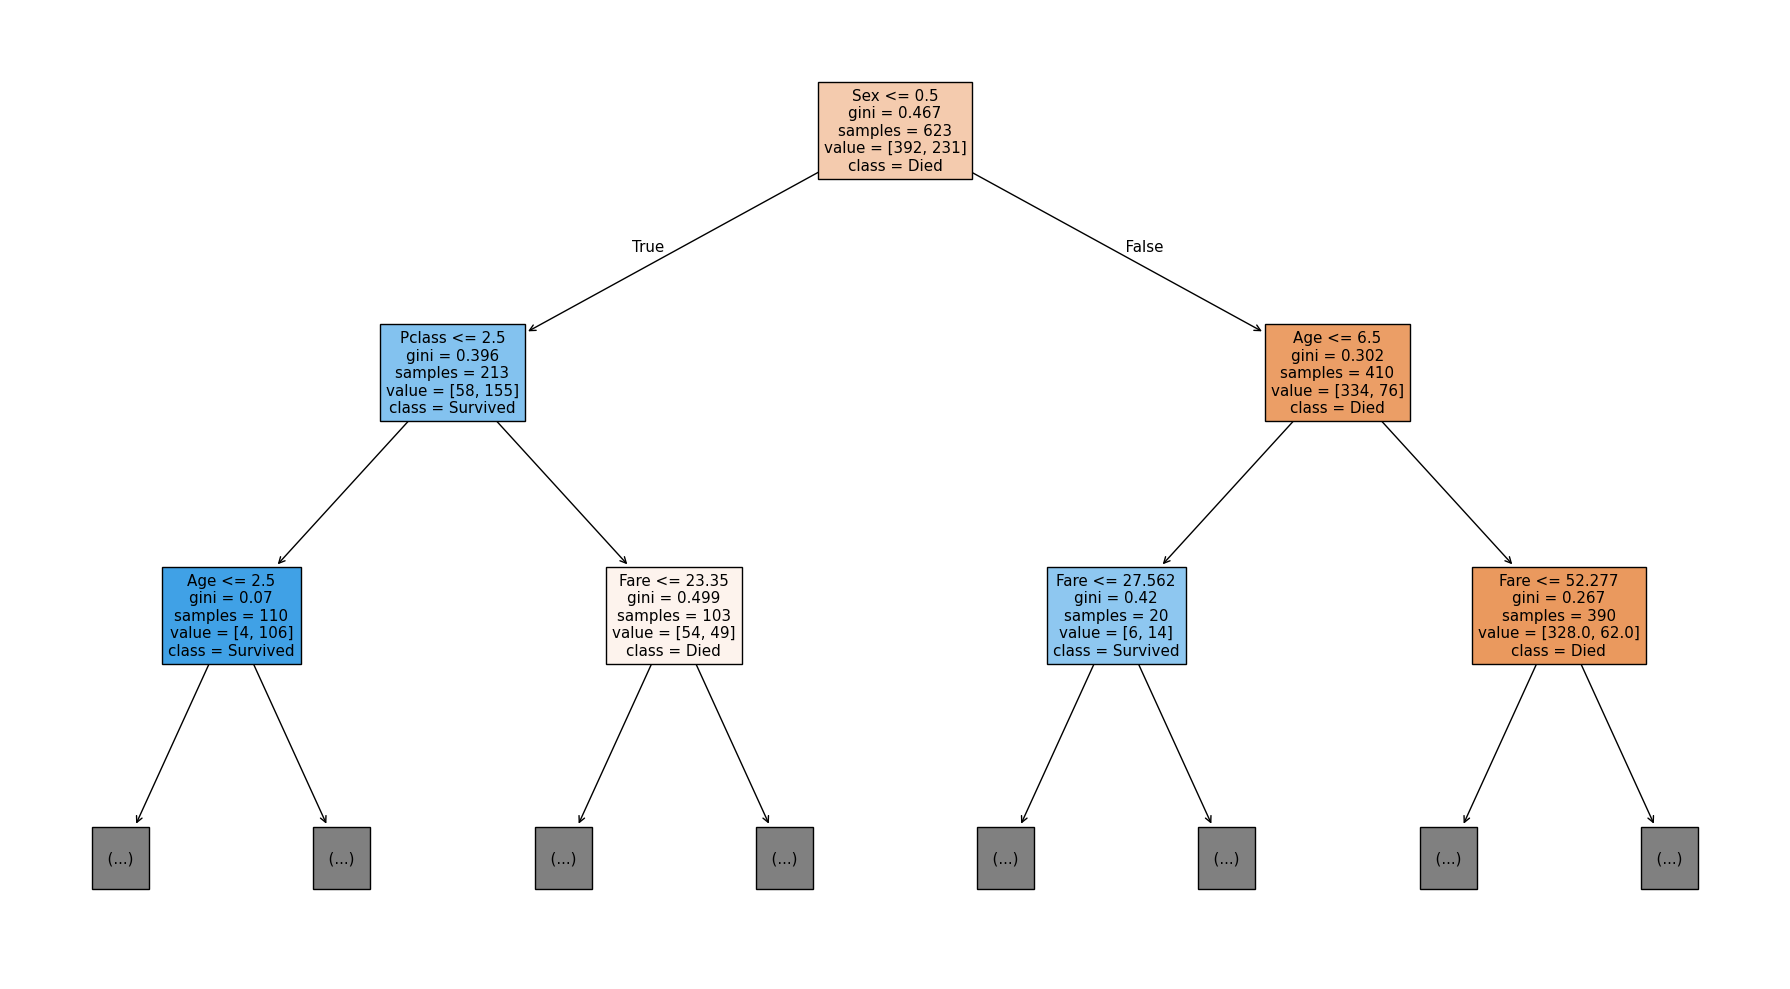

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10) ) 
plot_tree(
    model,
    feature_names = X.columns,
    class_names= ["Died", "Survived"],
    filled = True,
    max_depth= 2
)

plt.tight_layout()
plt.show()

for depth=2, accuracy=0.7723880597014925
for depth=3, accuracy=0.8059701492537313
for depth=4, accuracy=0.8246268656716418


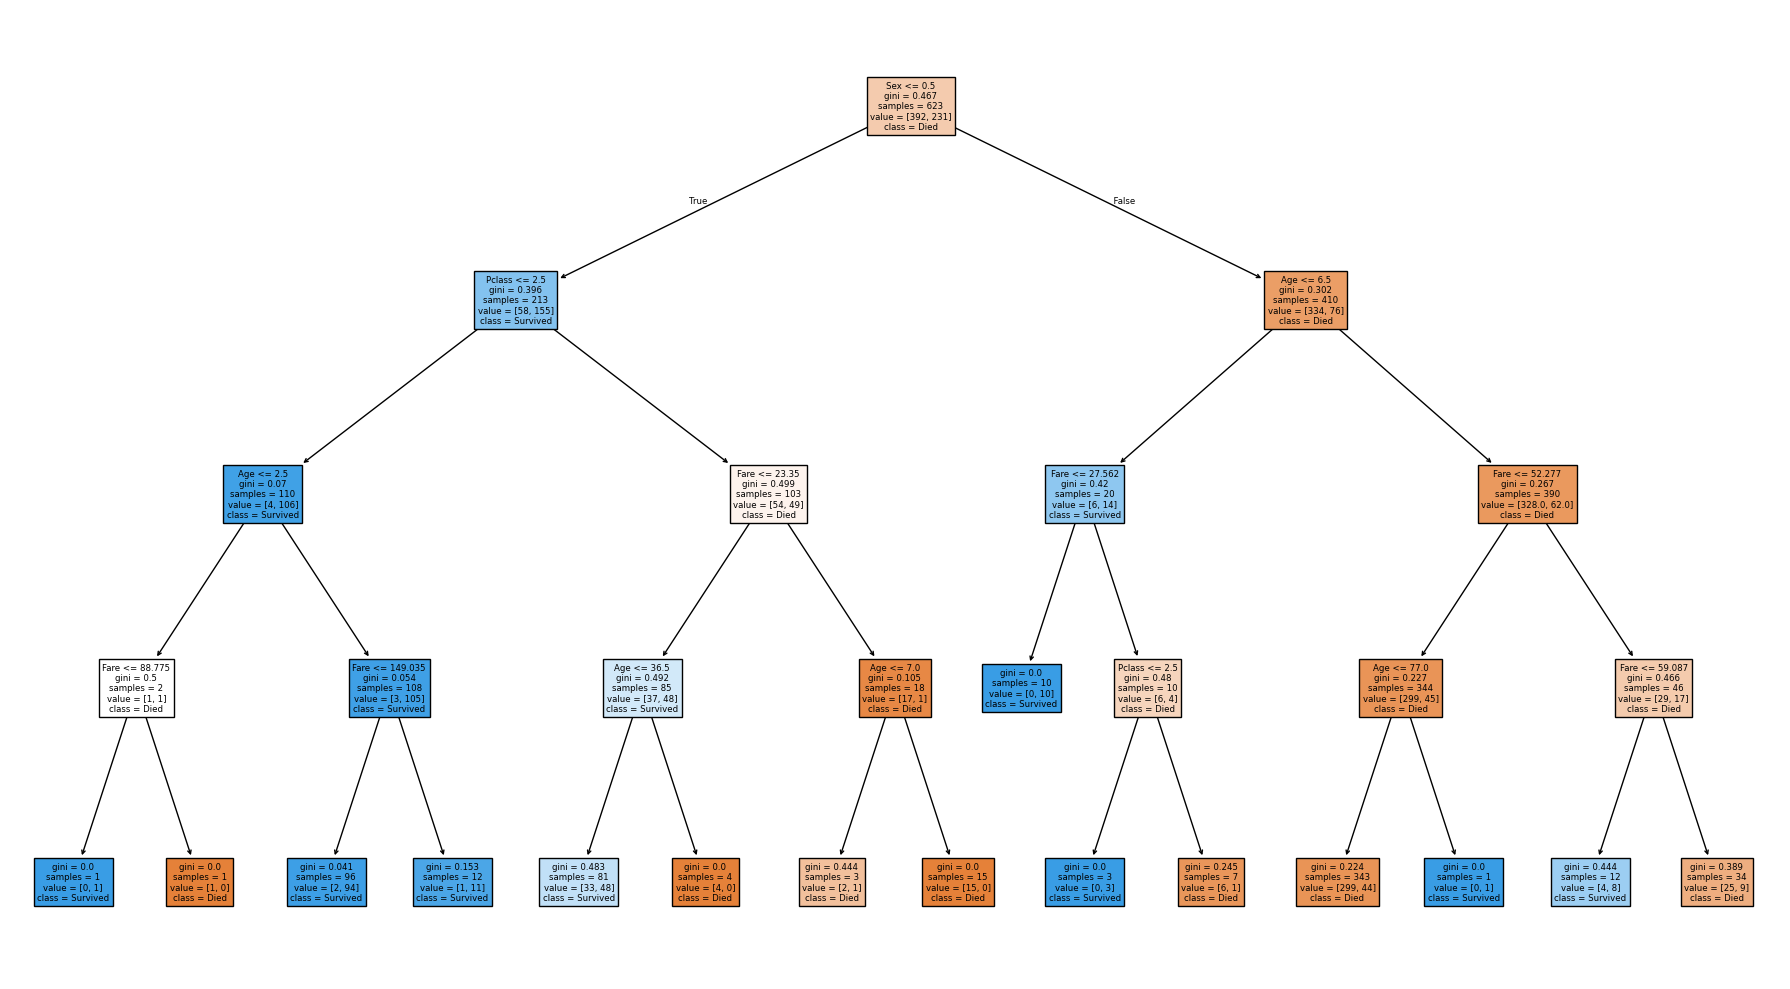

for depth=5, accuracy=0.7947761194029851
for depth=6, accuracy=0.7873134328358209
for depth=7, accuracy=0.7873134328358209
for depth=8, accuracy=0.8022388059701493
for depth=9, accuracy=0.7798507462686567
for depth=10, accuracy=0.7873134328358209


In [16]:
# Decision Tree With pre-pruning
max_depths = [2,3,4,5,6,7,8,9,10]

for depth in max_depths:  
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)

    acc= model.score(X_test, y_test)
    print(f"for depth={depth}, accuracy={acc}")

    if depth==4:
        plt.figure(figsize=(18, 10) ) 
        plot_tree(
            model,
            feature_names = X.columns,
            class_names= ["Died", "Survived"],
            filled = True
        )
        
        plt.tight_layout()
        plt.show()
    

for Min Sample Split=5, accuracy=0.8246268656716418
for Min Sample Split=10, accuracy=0.8246268656716418


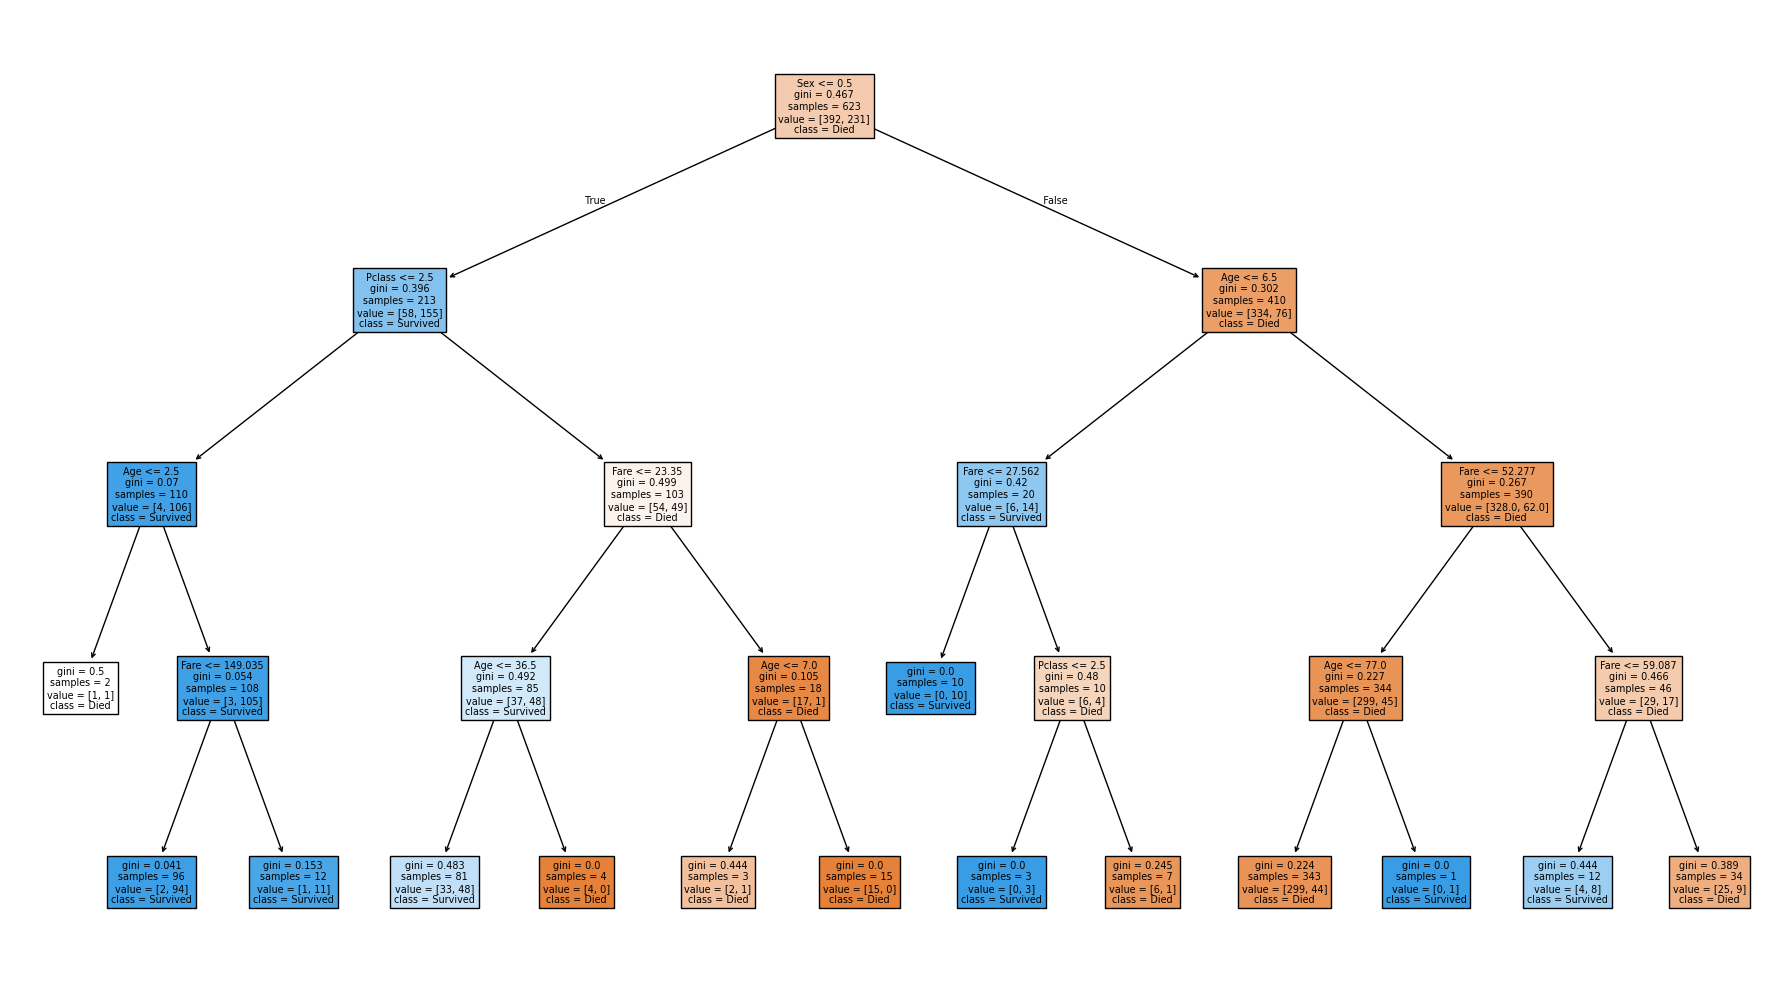

for Min Sample Split=15, accuracy=0.8171641791044776
for Min Sample Split=20, accuracy=0.8171641791044776
for Min Sample Split=25, accuracy=0.8208955223880597
for Min Sample Split=30, accuracy=0.8208955223880597


In [17]:
min_samples_splits = [5, 10, 15, 20, 25, 30]

for  split  in min_samples_splits:  
    model = DecisionTreeClassifier(max_depth=4, min_samples_split=split)
    model.fit(X_train, y_train)

    acc= model.score(X_test, y_test)
    print(f"for Min Sample Split={split}, accuracy={acc}")

    if split==10:
        plt.figure(figsize=(18, 10) ) 
        plot_tree(
            model,
            feature_names = X.columns,
            class_names= ["Died", "Survived"],
            filled = True
        )
        
        plt.tight_layout()
        plt.show()
    
    

In [18]:
# Decision Tree with Post - pruning
full_tree =  DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)

[0.         0.         0.00013376 0.00013376 0.00022931 0.00032103
 0.00048409 0.00053505 0.00053505 0.00053505 0.00062746 0.00064205
 0.00077709 0.00085607 0.00093633 0.00096308 0.00096308 0.00096308
 0.00099875 0.00101659 0.00104193 0.0010478  0.00107009 0.00109238
 0.00115927 0.0012352  0.00123729 0.00129646 0.00132211 0.00133563
 0.00137583 0.00137583 0.00139708 0.00143228 0.00144145 0.00150482
 0.00151596 0.00152184 0.00171215 0.00183444 0.0019012  0.00195674
 0.00200642 0.00214018 0.00233474 0.0024077  0.00260835 0.00263292
 0.00278606 0.00280169 0.00284379 0.00288925 0.00299625 0.00302412
 0.00431144 0.00495299 0.00577849 0.00589431 0.0074248  0.01236198
 0.01787674 0.04065074 0.1323581 ]


In [20]:
# train our model for all alphas

trees = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)

    trees.append((model, alpha))

In [21]:
best_acc = 0
best_alpha = 0

for model, alpha in trees:
    curr_acc = model.score(X_test, y_test)
    if curr_acc > best_acc:
        best_acc = curr_acc
        best_alpha =alpha

In [22]:
best_alpha

np.float64(0.0017121455323702516)

In [23]:
best_model = DecisionTreeClassifier(max_depth= 4, ccp_alpha=best_alpha) #also combine pre and post pruning
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0017121455323702516), max_depth=4)

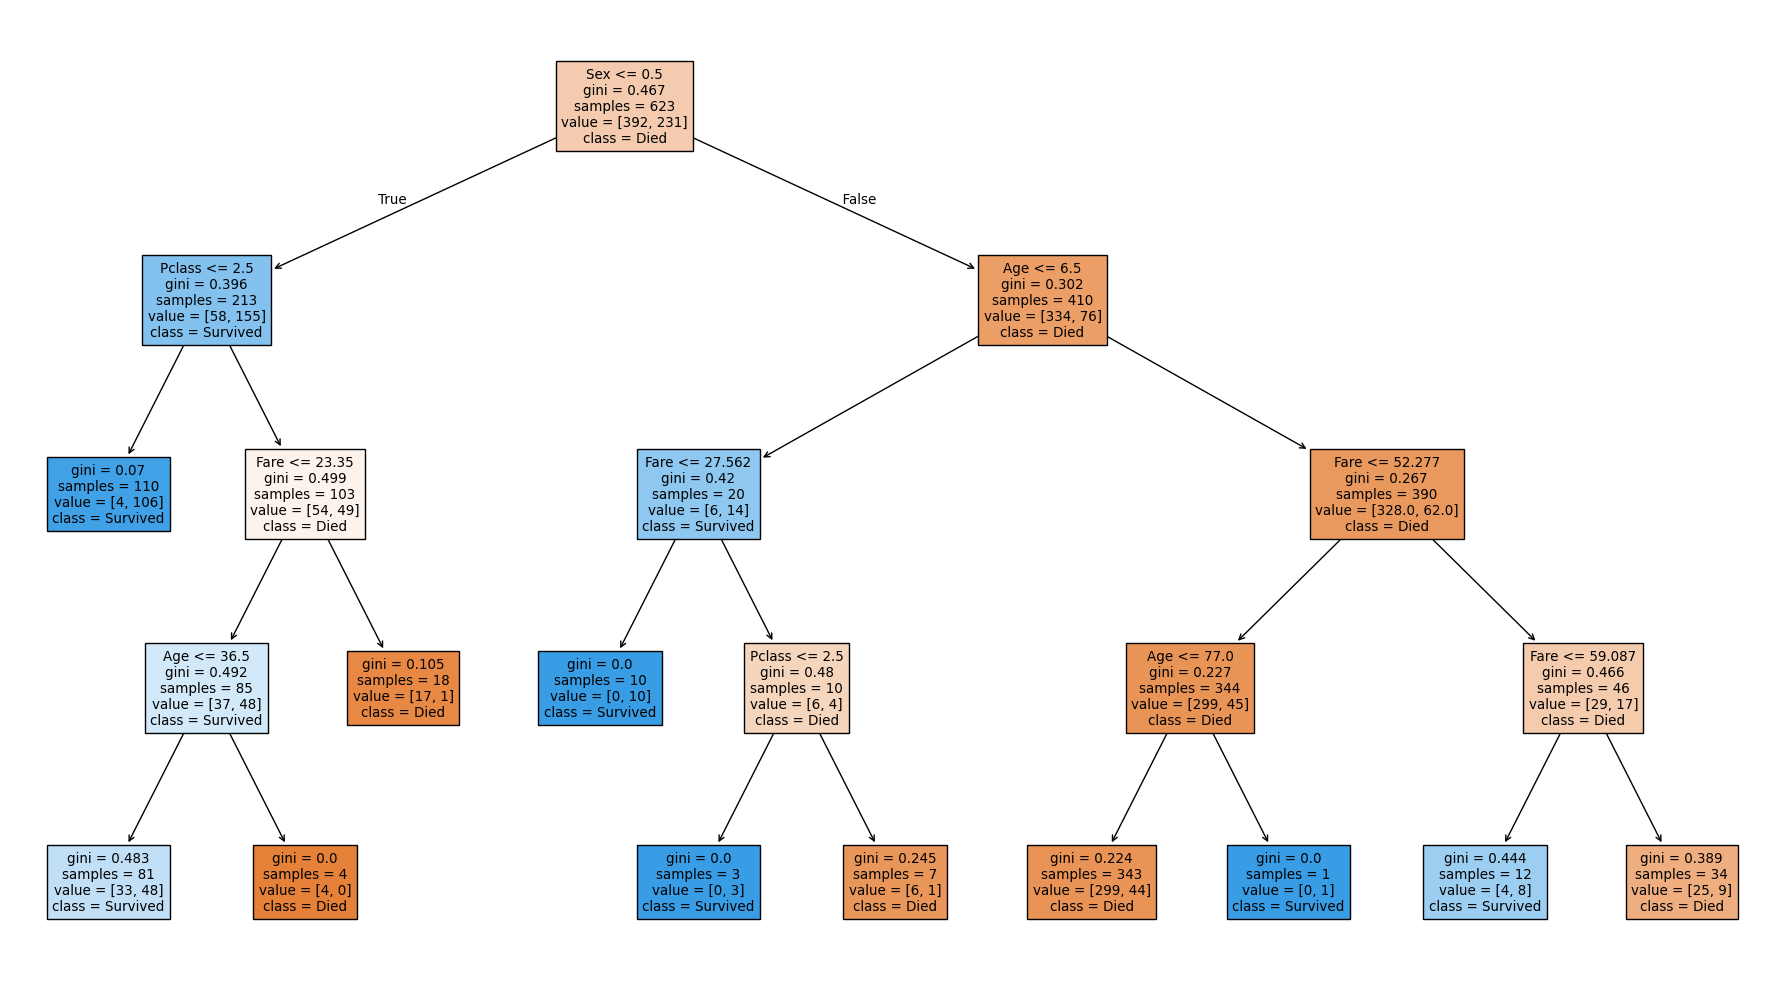

In [24]:
plt.figure(figsize=(18, 10) ) 
plot_tree(
    best_model,
    feature_names = X.columns,
    class_names= ["Died", "Survived"],
    filled = True
)

plt.tight_layout()
plt.show()


In [25]:
print(best_model.score(X_test, y_test))

0.8246268656716418
